In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Preprocessing Data

In [5]:
df_bank = pd.read_csv('/content/bank-full.csv', sep=';')

In [6]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

**Checking missing value**

In [8]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Handling ouliers**

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
numerical = df_bank.dtypes[df_bank.dtypes == 'int64'].index | df_bank.dtypes[df_bank.dtypes == 'float64'].index

numerical

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
df_bank.shape

(45211, 17)

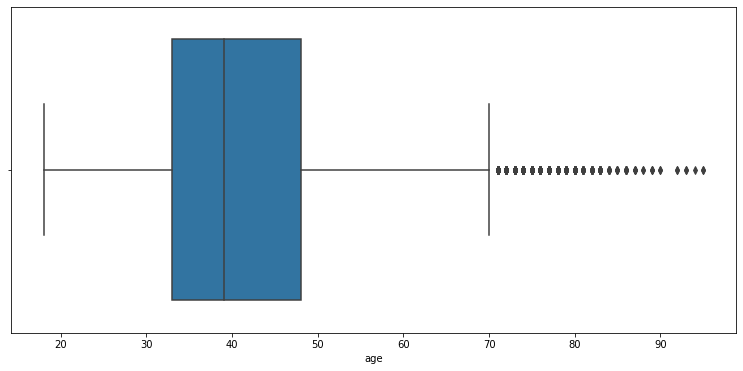

In [12]:
# check ouliers in feature that contain numerical dtypes
fig, axes = plt.subplots(figsize=(13, 6))
sns.boxplot(df_bank.age)
plt.show()

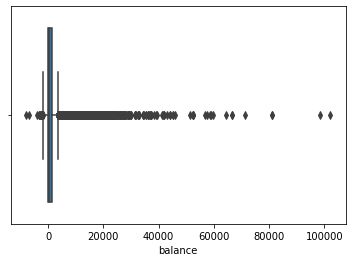

(45211, 17)

In [13]:
sns.boxplot(df_bank.balance)
plt.show()

df_bank.shape

We can see outliers by checking visualization on box plot for **balance** feature , cutting **balance**>50000 & **balance**<-6000 as outliers

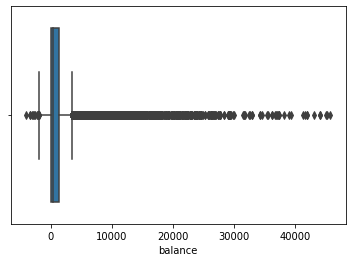

In [14]:
df_bank = df_bank[(df_bank.balance>-6000) & (df_bank.balance<50000)]

sns.boxplot(df_bank.balance)
plt.show()

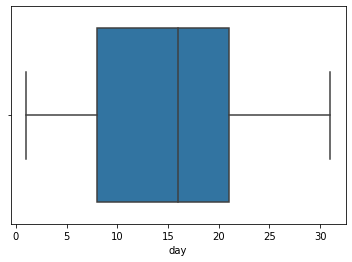

In [15]:
sns.boxplot(df_bank.day)
plt.show()

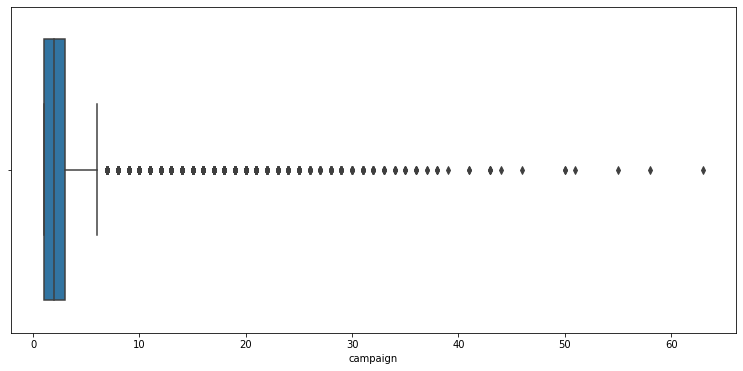

In [16]:
fig, axes = plt.subplots(figsize=(13, 6))
sns.boxplot(df_bank.campaign)
plt.show()

There is a break that occur arround the campaign count 40, cutting after campaign count 40.

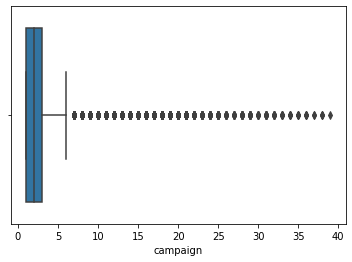

(45178, 17)

In [17]:
df_bank = df_bank[df_bank.campaign<40]

sns.boxplot(df_bank.campaign)
plt.show()

df_bank.shape

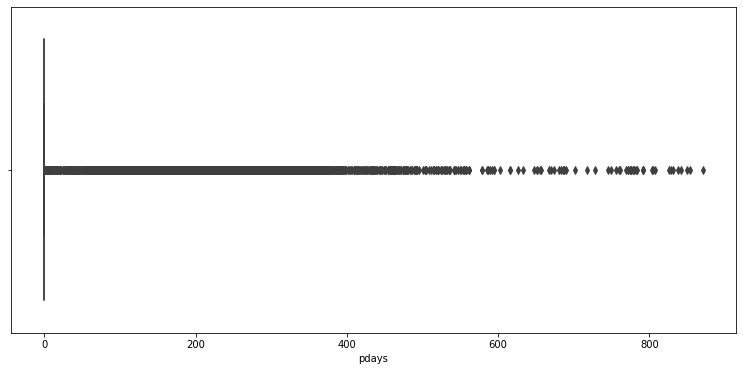

In [18]:
fig, axes = plt.subplots(figsize=(13, 6))
sns.boxplot(df_bank.pdays)
plt.show()

After pdays arround 570 has started breaking, cutting after pdays 570.

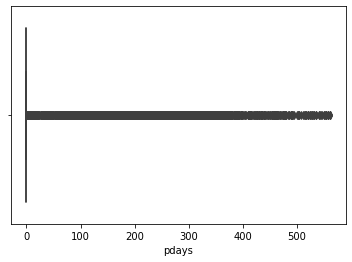

(45117, 17)

In [19]:
df_bank = df_bank[df_bank.pdays<570]

sns.boxplot(df_bank.pdays)
plt.show()

df_bank.shape

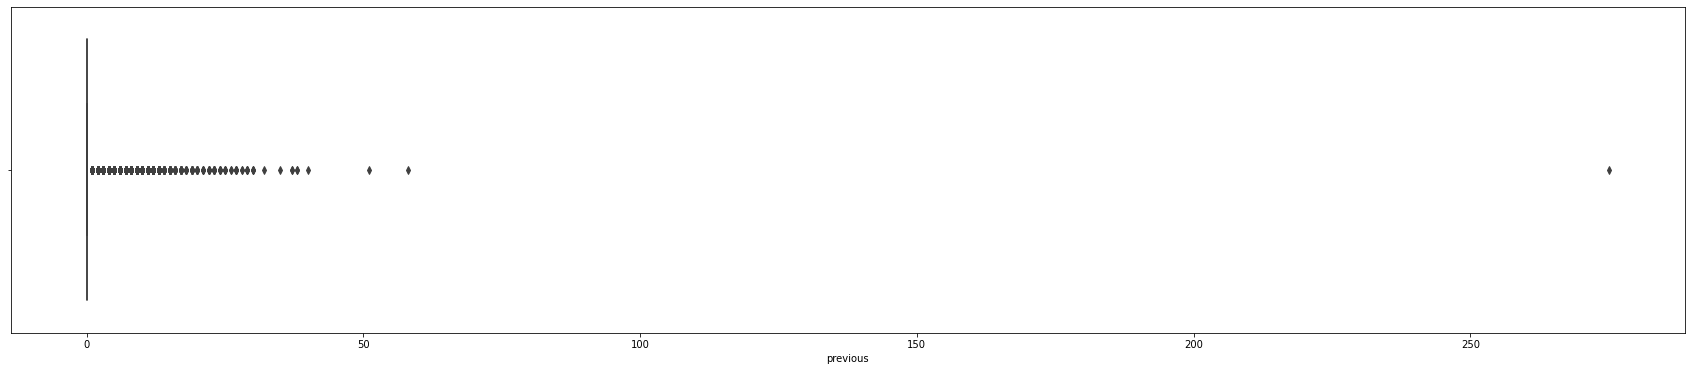

(45117, 17)

In [20]:
fig, axes = plt.subplots(figsize=(30, 6))
sns.boxplot(df_bank.previous)
plt.show()

df_bank.shape

A significant gap has occurred after number of contact that performed after 50, cutting number of contact performing after 50.

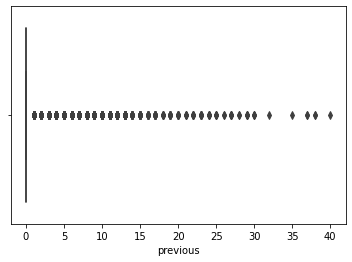

(45114, 17)

In [21]:
df_bank = df_bank[df_bank.previous<50]

sns.boxplot(df_bank.previous)
plt.show()

df_bank.shape

We have removed 45211-45114 = 97 rows that detect as outliers

In [22]:
categorical = df_bank.dtypes[df_bank.dtypes == 'object'].index 

In [23]:
le = LabelEncoder()

In [24]:
for i in range(0, len(categorical)):
    df_bank[categorical[i]] = le.fit_transform(df_bank[categorical[i]])

In [25]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


**Drop unwanted column**


---


duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



---



So i decided to drop **duration** feature

In [26]:
df_bank.drop(['duration'], axis=1, inplace=True)

In [27]:
df_bank.shape

(45114, 16)

**Corelation for each column**

Using heatmap visualisation to know corelation for each column

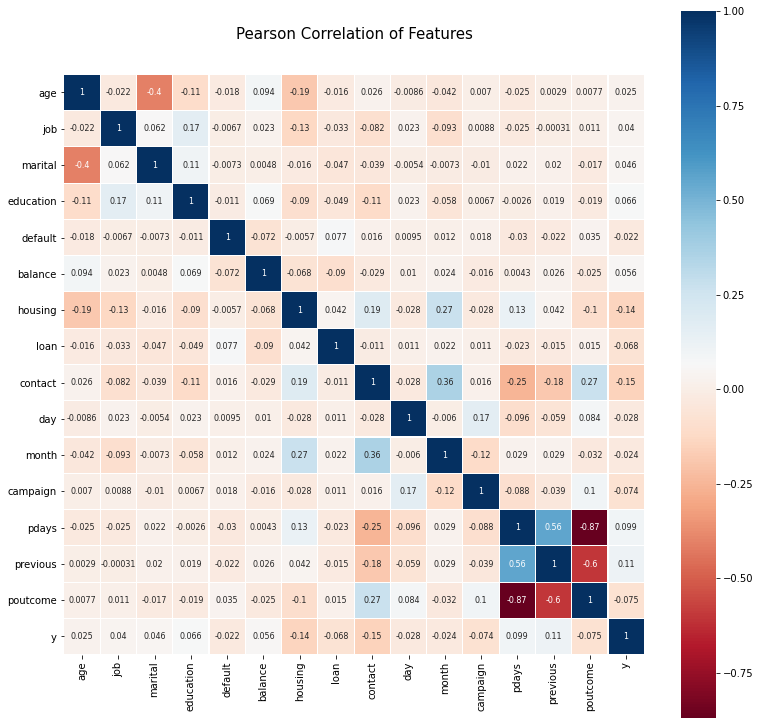

In [31]:
heatmapdata = df_bank

colormap = plt.cm.RdBu
plt.figure(figsize=(13, 13))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmapdata.astype(float).corr(), 
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True, 
            annot_kws={'size':8})
del heatmapdata

**Separate target**

We need to drop the target feature (y column) then assign to y variable

In [37]:
x = df_bank.drop('y', 1)

y = df_bank.y

In [38]:
x = pd.get_dummies(x)

In [39]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3


**Splitting the data**

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=43)

In [41]:
print("x_train shape is: ", x_train.shape)
print("x_test shape is: ", x_test.shape)

x_train shape is:  (31579, 15)
x_test shape is:  (13535, 15)


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

LR = LogisticRegression(solver='liblinear')

LR.fit(x_train, y_train)

predict_LR = LR.predict(x_test)

accuracy_LR = accuracy_score(y_test, predict_LR)
print("Accuracy: ", accuracy_LR, '\n')

print("Confusion Matrix: ",'\n' ,confusion_matrix(y_test, predict_LR))

Accuracy:  0.8845216106390839 

Confusion Matrix:  
 [[11956    19]
 [ 1544    16]]


# K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)

predict_KNN = KNN.predict(x_test)

accuracy_KNN = accuracy_score(y_test, predict_KNN)
print("Accuracy: ", accuracy_KNN,'\n')
print("Confusion Matrix: ",'\n' ,confusion_matrix(y_test, predict_KNN))

Accuracy:  0.8807536017731806 

Confusion Matrix:  
 [[11742   233]
 [ 1381   179]]


# Support Vector Machine

In [44]:
from sklearn import svm

model_SVM = svm.SVC()

model_SVM.fit(x_train, y_train)

predict_SVM = model_SVM.predict(x_test)

accuracy_SVM = accuracy_score(y_test, predict_SVM)
print("Model's accuracy: ", accuracy_SVM,'\n')
print("Confusion Matrix: ",'\n' ,confusion_matrix(y_test, predict_SVM))

Model's accuracy:  0.8847432582194311 

Confusion Matrix:  
 [[11975     0]
 [ 1560     0]]


# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)

predict_DT = DT.predict(x_test)

accuracy_DT = accuracy_score(y_test, predict_DT)
print("Accuracy: ", accuracy_DT, '\n')
print("Confusion Matrix: ",'\n' ,confusion_matrix(y_test, predict_DT))

Accuracy:  0.8277798300701884 

Confusion Matrix:  
 [[10736  1239]
 [ 1092   468]]


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(x_train, y_train)

predict_RF = RF.predict(x_test)

accuracy_RF = accuracy_score(y_test, predict_RF)
print("Accuracy: ", accuracy_RF, '\n')
print("Confusion Matrix: ",'\n' ,confusion_matrix(y_test, predict_RF))

Accuracy:  0.8950868119689693 

Confusion Matrix:  
 [[11806   169]
 [ 1251   309]]


#Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

NB.fit(x_train, y_train)

predict_NB = NB.predict(x_test)

accuracy_NB = accuracy_score(y_test, predict_NB)
print("Accuracy: ", accuracy_NB, '\n')
print("Confusion Matrix: ",'\n' ,confusion_matrix(y_test, predict_NB))

Accuracy:  0.8085703731067603 

Confusion Matrix:  
 [[10393  1582]
 [ 1009   551]]


After comparing model's accuracy for each clasification models, random forest's model has the highest accuracy.